In [18]:
import pandas as pd

import numpy as np

In [19]:
new=[]

In [20]:
for f in range(500):
#     try:
        f1=open(r"./resume/{}.txt".format(f),"r", encoding="utf8")
        new.append(f1.readlines())
#     except:
#         print(f)

In [21]:
len(new)

500

In [22]:
original_df=pd.DataFrame(columns=["tag" ,"subtag","content"])

In [23]:
original_df

,tag,subtag,content


In [24]:
for i in range(len(new)):
    df = pd.DataFrame([x.strip().split('\t') for x in new[i]],columns=["tag" ,"subtag","content"])
    original_df=pd.concat([original_df,df])

In [25]:
original_df=original_df.reset_index(drop=True)

In [26]:
header_index=original_df[original_df['tag']=="header"].index

In [27]:
original_df["head_actual"]=''

In [28]:
for i in range(len(original_df)):
    if i in header_index:
        original_df.loc[i,"head_actual"]=1
    else:
        original_df.loc[i,"head_actual"]=0

In [29]:
original_df.drop(['tag','subtag'],axis=1,inplace=True)

In [30]:
original_df

,content,head_actual
0,Jitesh Vishwakarma,0
1,E-mail-Id: - jvishwakarma123@gmail.com,0
2,Contact Number: - 9960902548,0
3,PROFESSIONAL SUMMARY:,1
4,· 4 years of technical experience in implement...,0
...,...,...
39999,· Permanent Add,0
40000,:,0
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0
40002,DATE:,0


In [31]:
original_df['word_count']=''

In [32]:
original_df['word_count']=[len(original_df.loc[i,'content'].split(" "))for i in range(len(original_df))]

In [33]:
original_df['len_text']=''

In [34]:
original_df['len_text']=[len(original_df.loc[i,'content']) for i in range(len(original_df))]

In [35]:
original_df

,content,head_actual,word_count,len_text
0,Jitesh Vishwakarma,0,2,18
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38
2,Contact Number: - 9960902548,0,4,28
3,PROFESSIONAL SUMMARY:,1,2,21
4,· 4 years of technical experience in implement...,0,16,123
...,...,...,...,...
39999,· Permanent Add,0,3,15
40000,:,0,1,1
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47
40002,DATE:,0,1,5


In [36]:
original_df['end_sym']=''

In [37]:
for i in range(len(original_df)):
    if(original_df.loc[i,'content'][-1]).isalpha():
        original_df.loc[i,'end_sym']=0
    elif(original_df.loc[i,'content'][-1]).isdigit():
         original_df.loc[i,'end_sym']=0
    else:
        original_df.loc[i,'end_sym']=1

In [38]:
original_df['len_avg_word']=original_df['len_text']//original_df['word_count']

In [39]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word
0,Jitesh Vishwakarma,0,2,18,0,9
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12
2,Contact Number: - 9960902548,0,4,28,0,7
3,PROFESSIONAL SUMMARY:,1,2,21,1,10
4,· 4 years of technical experience in implement...,0,16,123,1,7
...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5
40000,:,0,1,1,1,1
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6
40002,DATE:,0,1,5,1,5


In [40]:
import requests

In [41]:
x = requests.get('https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt',allow_redirects=True)

In [42]:
stop_words=x.text.split(',')

In [43]:
stop_words

['0o',
 '0s',
 '3a',
 '3b',
 '3d',
 '6b',
 '6o',
 'a',
 'a1',
 'a2',
 'a3',
 'a4',
 'ab',
 'able',
 'about',
 'above',
 'abst',
 'ac',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'ad',
 'added',
 'adj',
 'ae',
 'af',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'ag',
 'again',
 'against',
 'ah',
 'ain',
 "ain't",
 'aj',
 'al',
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'ao',
 'ap',
 'apart',
 'apparently',
 'appear',
 'appreciate',
 'appropriate',
 'approximately',
 'ar',
 'are',
 'aren',
 'arent',
 "aren't",
 'arise',
 'around',
 'as',
 "a's",
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'au',
 'auth',
 'av',
 'available',
 'aw',
 'away',
 'awfully',
 'ax',
 'ay',
 'az',

In [44]:
original_df['no_of_stop']=0

In [45]:
for i in range(len(original_df)):
    for l in original_df.loc[i,'content'].split(" "):
        if l in stop_words:
            original_df.loc[i,"no_of_stop"]+=1
        else:
            pass

In [46]:
original_df[original_df['no_of_stop']>1]

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop
4,· 4 years of technical experience in implement...,0,16,123,1,7,4
5,"· Having Domain Experience in PAYMENT, AUTOMOB...",0,9,66,1,7,2
6,· Experienced in developing Web based applicat...,0,14,101,1,7,2
7,"· Experience in designing, developing and depl...",0,17,129,1,7,3
9,· Hands on exposure to multiple Application Se...,0,15,94,1,6,4
...,...,...,...,...,...,...,...
39956,· Article Assistant with M/s yougesh & Jain fr...,0,12,73,0,6,3
39960,· Preparation of books of accounts of societie...,0,16,103,1,6,7
39962,· Ensuring compliance to related applicable la...,0,15,90,1,6,4
39964,· Certified course from Aptech as prescribed b...,0,9,52,0,5,4


In [47]:
original_df['numeric_value']=0

In [48]:
for i in range(len(original_df)):
    for letter in original_df.loc[i,'content']:
        if letter.isdigit():
            original_df.loc[i,"numeric_value"]+=1

In [49]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value
0,Jitesh Vishwakarma,0,2,18,0,9,0,0
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12,0,3
2,Contact Number: - 9960902548,0,4,28,0,7,0,10
3,PROFESSIONAL SUMMARY:,1,2,21,1,10,0,0
4,· 4 years of technical experience in implement...,0,16,123,1,7,4,1
...,...,...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5,0,0
40000,:,0,1,1,1,1,0,0
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6,0,11
40002,DATE:,0,1,5,1,5,0,0


In [50]:
original_df['no_of_sym']=0

In [51]:
for i in range(len(original_df)):
    for letter in original_df.loc[i,'content']:
        if letter.isdigit():
            pass
        elif letter.isalpha():
            pass
        elif letter==' ':
            pass
        else:
            original_df.loc[i,"no_of_sym"]+=1

In [52]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym
0,Jitesh Vishwakarma,0,2,18,0,9,0,0,0
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12,0,3,6
2,Contact Number: - 9960902548,0,4,28,0,7,0,10,2
3,PROFESSIONAL SUMMARY:,1,2,21,1,10,0,0,1
4,· 4 years of technical experience in implement...,0,16,123,1,7,4,1,4
...,...,...,...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5,0,0,1
40000,:,0,1,1,1,1,0,0,1
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6,0,11,4
40002,DATE:,0,1,5,1,5,0,0,1


In [53]:
wordss=" ".join(original_df[original_df['head_actual']==1]['content'].values)

In [54]:
wordss=wordss.strip()

In [55]:
wordss=wordss.split(" ")

In [56]:
d = dict()
for word in wordss:
    if word in d:
        d[word] = d[word] + 1
    else:
        d[word] = 1

In [57]:
d

{'PROFESSIONAL': 97,
 'SUMMARY:': 12,
 'TECHNICAL': 74,
 'SKILLS:': 47,
 'EMPLOYMENT': 13,
 'HISTORY': 6,
 'WORK': 97,
 'EXPERIENCE': 131,
 'Product': 1,
 'Summary:': 46,
 'Responsibilities:': 172,
 'Project': 260,
 '#': 28,
 '1:': 9,
 'Gripic.in': 1,
 'EDUCATIONAL': 88,
 'QUALIFICATION': 66,
 'PERSONAL': 232,
 'DETAILS': 108,
 'Date': 68,
 ':': 227,
 'PROFILE': 66,
 'SUMMARY': 47,
 'CAREER': 102,
 'OBJECTIVE:': 48,
 'STRENGTH': 6,
 '&': 111,
 'EDUCATION': 52,
 'BACKGROUND:': 3,
 'EXTRA': 27,
 'QUALIFICATIONS': 26,
 'Scope': 2,
 'of': 105,
 'Responsibilities': 67,
 'and': 138,
 'Functions:': 1,
 'COMPETENCIES': 7,
 'LANGUAGES': 19,
 'KNOWN': 12,
 'HOBBIES': 23,
 'DATE': 8,
 'OF': 24,
 'BIRTH': 5,
 'REFERENCE': 4,
 'DECLARATION': 38,
 'INFORMATION': 20,
 'Professional': 106,
 'Synopsis': 7,
 '·': 93,
 'Knowledge': 8,
 'in': 45,
 'SAP': 6,
 'HANA': 3,
 'Administration': 2,
 'Scholastic': 1,
 'Credentials': 7,
 'Work': 101,
 'History': 7,
 'Accountabilities:': 5,
 'Accountabilities': 10,


In [58]:
keys = list(d.keys())
values = list(d.values())
sorted_value_index = np.argsort(values)

In [59]:
sorted_value_index

array([1212, 1595, 1594, ...,   20,   17,   11], dtype=int64)

In [60]:
sorted_dict = {keys[i]: values[i] for i in sorted_value_index[::-1]}

In [61]:
most_frequnt_words=list(sorted_dict.items())[:100]

In [62]:
most_frequnt_wordss=[]
for i in most_frequnt_words:
    most_frequnt_wordss.append(i[0])

In [63]:
most_frequnt_wordsss=[]
for i in most_frequnt_wordss:
    if(len(i)==1 or len(i)==2):
        pass
    else:
        most_frequnt_wordsss.append(i.lower())

In [64]:
most_frequnt_wordss
d2 = dict()
for word in most_frequnt_wordsss:
    if word in d2:
        d2[word] = d2[word] + 1
    else:
        d2[word] = 1

In [65]:
most_frequnt_wordsss=list(d2.keys())

In [66]:
most_frequnt_wordsss=" ".join(most_frequnt_wordsss)

In [67]:
most_frequnt_wordsss

'project personal responsibilities: and experience skills details professional career work technical objective languages profile educational resume academic name roles key summary job date experience: responsibilities qualification education curriculum vitae known qualification: skills: description: computer objective: summary: profile: details: birth title declaration: date: the nationality declaration address achievements projects description skill marital extra role management'

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
vector_matrix = count_vectorizer.fit_transform([" ",most_frequnt_wordsss])
vector_matrix.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1]],
      dtype=int64)

In [69]:
tokens = count_vectorizer.get_feature_names_out()
tokens

array(['academic', 'achievements', 'address', 'and', 'birth', 'career',
       'computer', 'curriculum', 'date', 'declaration', 'description',
       'details', 'education', 'educational', 'experience', 'extra',
       'job', 'key', 'known', 'languages', 'management', 'marital',
       'name', 'nationality', 'objective', 'personal', 'professional',
       'profile', 'project', 'projects', 'qualification',
       'responsibilities', 'resume', 'role', 'roles', 'skill', 'skills',
       'summary', 'technical', 'the', 'title', 'vitae', 'work'],
      dtype=object)

In [70]:
tokens=" ".join(tokens)

In [71]:
tokens

'academic achievements address and birth career computer curriculum date declaration description details education educational experience extra job key known languages management marital name nationality objective personal professional profile project projects qualification responsibilities resume role roles skill skills summary technical the title vitae work'

In [72]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym
0,Jitesh Vishwakarma,0,2,18,0,9,0,0,0
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12,0,3,6
2,Contact Number: - 9960902548,0,4,28,0,7,0,10,2
3,PROFESSIONAL SUMMARY:,1,2,21,1,10,0,0,1
4,· 4 years of technical experience in implement...,0,16,123,1,7,4,1,4
...,...,...,...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5,0,0,1
40000,:,0,1,1,1,1,0,0,1
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6,0,11,4
40002,DATE:,0,1,5,1,5,0,0,1


In [73]:
original_df['cos_sim']=0

In [74]:
from numpy import dot
from numpy.linalg import norm
for i in range(len(original_df)):
    vector_matrix = count_vectorizer.fit_transform([original_df.loc[i,"content"],tokens])
    vector_matrix=vector_matrix.toarray()
    cos_sim = dot(vector_matrix[0], vector_matrix[1])/(norm(vector_matrix[0])*norm(vector_matrix[1]))
    if(cos_sim>0):
        original_df.loc[i,"cos_sim"]=1

C:\Users\rajendran\AppData\Local\Temp\ipykernel_20852\1175633283.py:6: RuntimeWarning: invalid value encountered in true_divide
  cos_sim = dot(vector_matrix[0], vector_matrix[1])/(norm(vector_matrix[0])*norm(vector_matrix[1]))


In [75]:
nan_index=original_df[original_df['cos_sim'].isna()].index

In [76]:
original_df.loc[nan_index,"cos_sim"]=0

In [77]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym,cos_sim
0,Jitesh Vishwakarma,0,2,18,0,9,0,0,0,0
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12,0,3,6,0
2,Contact Number: - 9960902548,0,4,28,0,7,0,10,2,0
3,PROFESSIONAL SUMMARY:,1,2,21,1,10,0,0,1,1
4,· 4 years of technical experience in implement...,0,16,123,1,7,4,1,4,1
...,...,...,...,...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5,0,0,1,0
40000,:,0,1,1,1,1,0,0,1,0
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6,0,11,4,0
40002,DATE:,0,1,5,1,5,0,0,1,1


In [78]:
original_df["case"]=''

In [79]:
for i in range(len(original_df)):
    if(original_df.content[i].isupper()):
        original_df.loc[i,"case"]=0
    elif(original_df.content[i].islower()):
        original_df.loc[i,"case"]=1
    elif(original_df.content[i][0].isupper()):
        original_df.loc[i,"case"]=2
    else:
        original_df.loc[i,"case"]=3
    

In [80]:
original_df

,content,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym,cos_sim,case
0,Jitesh Vishwakarma,0,2,18,0,9,0,0,0,0,2
1,E-mail-Id: - jvishwakarma123@gmail.com,0,3,38,0,12,0,3,6,0,2
2,Contact Number: - 9960902548,0,4,28,0,7,0,10,2,0,2
3,PROFESSIONAL SUMMARY:,1,2,21,1,10,0,0,1,1,0
4,· 4 years of technical experience in implement...,0,16,123,1,7,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...
39999,· Permanent Add,0,3,15,0,5,0,0,1,0,3
40000,:,0,1,1,1,1,0,0,1,0,3
40001,"238, sector 78, SAS Nagar Mohali, Punjab-140308",0,7,47,0,6,0,11,4,0,3
40002,DATE:,0,1,5,1,5,0,0,1,1,0


In [81]:
original_df.drop(["content"],axis=1,inplace=True)

In [82]:
original_df.to_csv("final.csv")

In [83]:
original_df=pd.read_csv("final.csv",index_col=0)

In [84]:
original_df

,head_actual,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym,cos_sim,case
0,0,2,18,0,9,0,0,0,0,2
1,0,3,38,0,12,0,3,6,0,2
2,0,4,28,0,7,0,10,2,0,2
3,1,2,21,1,10,0,0,1,1,0
4,0,16,123,1,7,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...
39999,0,3,15,0,5,0,0,1,0,3
40000,0,1,1,1,1,0,0,1,0,3
40001,0,7,47,0,6,0,11,4,0,3
40002,0,1,5,1,5,0,0,1,1,0


In [85]:
original_df_input=original_df[original_df.columns[1:]]

In [86]:
original_df_input

,word_count,len_text,end_sym,len_avg_word,no_of_stop,numeric_value,no_of_sym,cos_sim,case
0,2,18,0,9,0,0,0,0,2
1,3,38,0,12,0,3,6,0,2
2,4,28,0,7,0,10,2,0,2
3,2,21,1,10,0,0,1,1,0
4,16,123,1,7,4,1,4,1,1
...,...,...,...,...,...,...,...,...,...
39999,3,15,0,5,0,0,1,0,3
40000,1,1,1,1,0,0,1,0,3
40001,7,47,0,6,0,11,4,0,3
40002,1,5,1,5,0,0,1,1,0


In [87]:
original_df_output=original_df["head_actual"]

In [88]:
original_df_output

0        0
1        0
2        0
3        1
4        0
        ..
39999    0
40000    0
40001    0
40002    0
40003    0
Name: head_actual, Length: 40004, dtype: int64

In [89]:
# K-Nearest Neighbors
# (KNN), 
# Support Vector Machine(SVM) with RBF kernel and
# ensembling techniques like Bagging, 
# Random Forest (RB),
# Gradient Boosting (GB), 
# Extreme Gradient Boosting (XGB),
# Ada boost and LightGBM. 

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(original_df_input, original_df_output, test_size=0.33, random_state=42)

In [91]:
X_train["end_sym"]

4736     0
8451     0
37330    1
9948     1
32274    1
        ..
6265     0
11284    0
38158    1
860      0
15795    1
Name: end_sym, Length: 26802, dtype: int64

In [92]:
y_train

4736     0
8451     0
37330    0
9948     0
32274    0
        ..
6265     0
11284    1
38158    0
860      0
15795    0
Name: head_actual, Length: 26802, dtype: int64

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [94]:
y_pred=clf.predict(X_test)

In [95]:
y_test[y_pred!=y_test]

1557     1
35944    1
33395    1
23417    1
19221    1
        ..
33801    1
33819    1
21929    1
36370    1
4755     1
Name: head_actual, Length: 1378, dtype: int64

In [96]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.896
Recall: 0.203
Precision: 0.914
F1 Score: 0.332


In [99]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

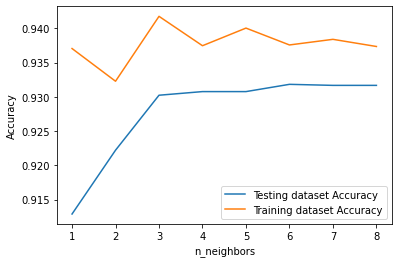

In [100]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()


In [101]:
y_pred=neigh.predict(X_test)

In [102]:
y_test[y_pred!=y_test]

1557     1
21920    0
8106     0
13951    1
24769    1
        ..
22896    1
4894     1
26218    1
33819    1
4596     0
Name: head_actual, Length: 921, dtype: int64

In [103]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.930
Recall: 0.685
Precision: 0.748
F1 Score: 0.715


In [104]:
from xgboost import XGBClassifier
model = XGBClassifier()
# fit the model on the whole dataset
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [105]:
y_pred = model.predict(X_test)
y_test[y_pred!=y_test]

1557     1
21920    0
8106     0
13951    1
14198    0
        ..
12947    0
22896    1
26218    1
33819    1
4596     0
Name: head_actual, Length: 786, dtype: int64

In [106]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Accuracy: 0.940
Recall: 0.723
Precision: 0.793
F1 Score: 0.757
